In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
import scipy.stats as stats
import sklearn
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error




In [11]:
dataSet = pd.read_csv("property-sales-data-2020.csv")
dataSet = dataSet[dataSet.PropType == 'Residential'].drop("PropType", axis=1)
dataSet = dataSet[dataSet.Sale_price < 600000]
dataSet = dataSet.drop(['PropertyID','taxkey','Address','Sale_date','nbhd','CondoProject' , "Units", "Bdrms", "Stories",'Lotsize'], axis = 1)
dataSet = dataSet.dropna(axis=0)


In [12]:
#start of visulization

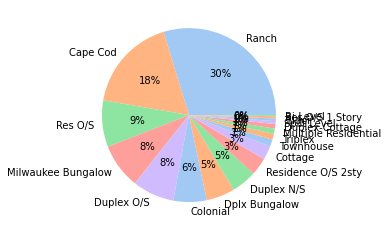

In [13]:
data= dataSet['Style'].value_counts()

labels = ['Ranch', 'Cape Cod', 'Res O/S', 'Milwaukee Bungalow', 'Duplex O/S','Colonial','Dplx Bungalow','Duplex N/S','Residence O/S 2sty','Cottage','Townhouse','Triplex','Multiple Residential','Duplex-Cottage','Split Level','Tudor','Res O/S 1 Story','Bi-Level']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

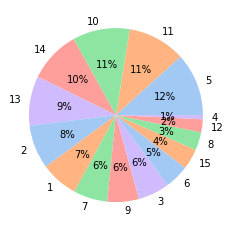

In [14]:
data2= dataSet['District'].value_counts()

labels = ['5', '11', '10', '14', '13','2','1','7','9','3','6','15','8','12','4']



#create pie chart
plt.pie(data2, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

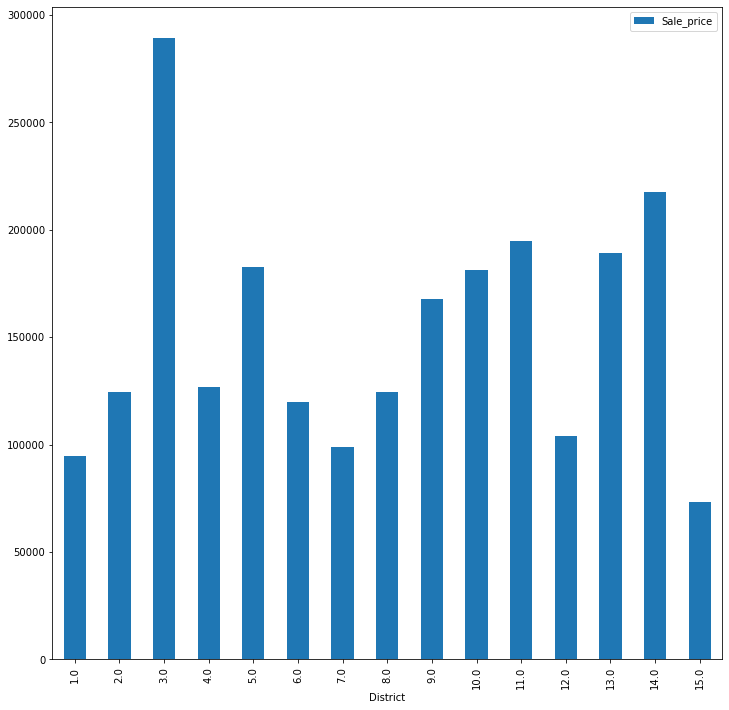

In [15]:
data1 = dataSet.groupby('District').agg({'Sale_price': np.average})
DistPrice = data1.plot.bar(y='Sale_price', figsize=(12, 12))

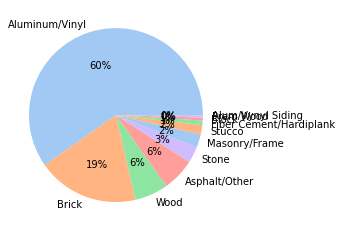

In [16]:
data3= dataSet['Extwall'].value_counts()

labels = ['Aluminum/Vinyl', 'Brick', 'Wood','Asphalt/Other', 'Stone','Masonry/Frame','Stucco','Fiber Cement/Hardiplank','Block','Prem Wood','Alum/Vynyl Siding']



#create pie chart
plt.pie(data3, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

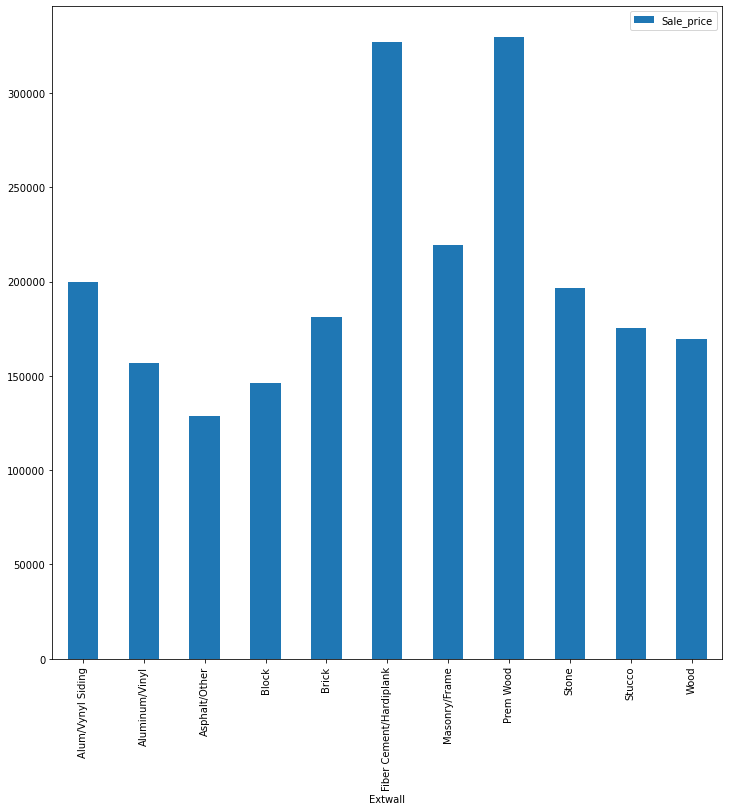

In [17]:
data4 = dataSet.groupby('Extwall').agg({'Sale_price': np.average})
WallPrice = data4.plot.bar(y='Sale_price', figsize=(12, 12))

In [18]:
# Preping for Regression

In [19]:

from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False, drop="first")
encoding = pd.DataFrame(onehot_encoder.fit_transform(dataSet[["Extwall"]]), columns=onehot_encoder.get_feature_names(['Extwall']), index=dataSet.index)
dataSet = pd.concat((dataSet, encoding), axis=1).drop("Extwall", axis=1)


In [20]:

encoding = pd.DataFrame(onehot_encoder.fit_transform(dataSet[["District"]]), columns=onehot_encoder.get_feature_names(['District']), index=dataSet.index)
dataSet = pd.concat((dataSet, encoding), axis=1).drop("District", axis=1)


In [21]:
encoding = pd.DataFrame(onehot_encoder.fit_transform(dataSet[["Style"]]), columns=onehot_encoder.get_feature_names(['Style']), index=dataSet.index)
dataSet = pd.concat((dataSet, encoding), axis=1).drop("Style", axis=1)
VanGough = dataSet.copy()

                                  Year_Built     Rooms  FinishedSqft  \
Year_Built                          1.000000 -0.373424     -0.217516   
Rooms                              -0.373424  1.000000      0.827255   
FinishedSqft                       -0.217516  0.827255      1.000000   
Fbath                              -0.176576  0.608093      0.688460   
Hbath                               0.286745 -0.031796      0.109905   
Sale_price                          0.145144  0.158264      0.391180   
Extwall_Aluminum/Vinyl             -0.037688 -0.016503     -0.111534   
Extwall_Asphalt/Other              -0.188703  0.107764      0.039518   
Extwall_Block                       0.009037 -0.013643     -0.021397   
Extwall_Brick                       0.173781 -0.105961     -0.021325   
Extwall_Fiber Cement/Hardiplank     0.105288  0.013521      0.099615   
Extwall_Masonry/Frame               0.029374  0.094239      0.146543   
Extwall_Prem Wood                   0.113114 -0.002032      0.07

<AxesSubplot:>

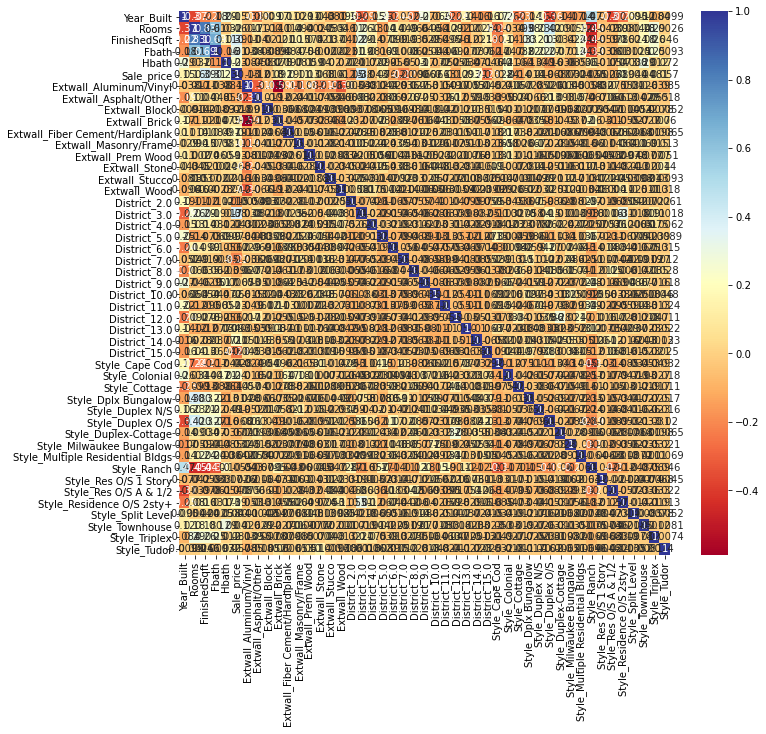

In [22]:
#Correlation matrix
cor_matrix = VanGough.corr()
print(cor_matrix)
plt.figure(figsize=(11,10))
sns.heatmap(cor_matrix, annot=True, cmap=plt.cm.RdYlBu)

In [23]:
#from sklearn.preprocessing import LabelEncoder
#label_encoder = LabelEncoder()
#VanGough['Extwall'] = label_encoder.fit_transform(VanGough['Extwall'])
#VanGough['Style'] = label_encoder.fit_transform(VanGough['Style'])
# print(transPropType)
#print(transExtwall)
#print(transStyle)
#VanGough


In [24]:
X = VanGough.drop('Sale_price', axis = 1)
Y = VanGough['Sale_price']
X = (X - X.min())/ (X.max() - X.min()) 


In [25]:
X

,Year_Built,Rooms,FinishedSqft,Fbath,Hbath,Extwall_Aluminum/Vinyl,Extwall_Asphalt/Other,Extwall_Block,Extwall_Brick,Extwall_Fiber Cement/Hardiplank,...,Style_Milwaukee Bungalow,Style_Multiple Residential Bldgs,Style_Ranch,Style_Res O/S 1 Story,Style_Res O/S A & 1/2,Style_Residence O/S 2sty+,Style_Split Level,Style_Townhouse,Style_Triplex,Style_Tudor
0,0.917647,0.523810,0.400345,0.500000,0.1,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.917647,0.523810,0.400345,0.500000,0.1,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.917647,0.476190,0.501055,0.500000,0.1,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.941176,0.333333,0.311721,0.333333,0.1,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.588235,0.238095,0.110301,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,0.647059,0.238095,0.083829,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4683,0.652941,0.238095,0.071744,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4684,0.647059,0.238095,0.083829,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4685,0.647059,0.238095,0.083829,0.166667,0.1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,train_size =.8,random_state = 0)
print(x_train.shape, y_train.shape) #3106 datapoints in train
print(x_test.shape, y_test.shape) #777 datapoints in test

(3106, 46) (3106,)
(777, 46) (777,)


In [27]:
mlr = LinearRegression()
mlr_model = mlr.fit(x_train, y_train)
print(mlr_model.intercept_)
print(mlr_model.coef_)

-20613.194726125686
[  15093.04490859  -20734.09827621  344582.56735259  144591.68127974
  134901.4716239    30433.34404298   13267.00292623   21815.82525743
   37638.25361564   95262.441525     37981.82499955   69156.58928524
   47347.96989001   40271.47149539   33036.34511968   18915.99621369
  147752.62632429  -17447.15910614   60680.52982012   12761.63151759
   -8103.6593483    26034.8905756    42116.83322299   68102.08044975
   82424.51155445   16170.33825944   81649.72918741  116828.36424045
  -41736.38359071    7284.35018068   28356.35891999  -18385.51230898
  -61348.87142288  -54934.40597911  -64023.24611907  -73101.47116415
    2205.169304   -107142.36901043   13586.13919544   20929.31037823
   -6077.07685136    8011.86997361   23857.44926923  -75599.33002639
  -87655.57111339   33623.94242941]


In [28]:
mlr_predict_train = mlr.predict(x_train)
mlr_predict_test = mlr.predict(x_test)
print(mlr_predict_train)
print(mlr_predict_test)

[ 72528.87298441 209811.16205019 114302.99328104 ... 146759.50181807
 128055.68717901  80149.77121931]
[107207.03296228 209489.46155473 180921.11453413 176593.03512384
 164369.58073075 343526.34315334 185256.45401996 210853.94807256
 191698.66522199 147129.99171295 192540.54991639 173208.63956374
 203108.37542688 127965.08315571  65046.4111644  144066.02986725
 116535.06200512 111923.65141722 188613.67411048 183495.65126001
 205170.69044751 204900.16049948 154805.09465943 154774.54605875
 212946.52897605 114157.63494898 236970.26645268 213341.51280539
 154644.44444263 172535.06958475 199505.04730938 134831.66171806
 283072.56517275  73799.21477733 220402.30290759  54309.28425244
 114641.06364974 125061.82558103 130161.19920772  75118.42453036
 171691.96610826  53866.98484391 169470.32551299 164068.55773382
 246504.46517938  94638.70100805 113809.44455413 235989.29019566
  44665.58813667 179737.9288473   52356.12136617 214056.45153303
 191173.15824612  66963.87262179 144787.95175291  96

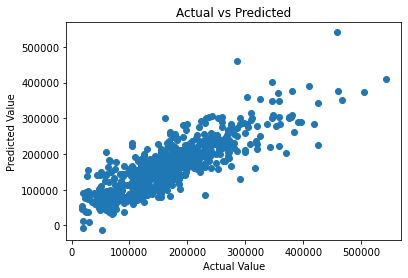

In [29]:
plt.scatter(y_test, mlr_predict_test);
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs Predicted");

In [30]:
mse_train = mean_squared_error(y_train,mlr_predict_train)
np.sqrt(mse_train)

44260.916423815

In [31]:
mse_test = mean_squared_error(y_test,mlr_predict_test)
np.sqrt(mse_test)

43414.78311495996

In [32]:
print('R-squared score (training): {:.3f}'.format(mlr_model.score(x_train, y_train)))
print(f'R-squared score (test): {mlr_model.score(x_test, y_test):.3f}')

R-squared score (training): 0.699
R-squared score (test): 0.704


In [33]:
import statsmodels.api as sm
Ols_reg = sm.OLS(y_train,sm.add_constant(x_train))
results = Ols_reg.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale_price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     154.4
Date:                Mon, 06 Dec 2021   Prob (F-statistic):               0.00
Time:                        20:26:07   Log-Likelihood:                -37635.
No. Observations:                3106   AIC:                         7.536e+04
Df Residuals:                    3059   BIC:                         7.565e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [34]:
influence = results.get_influence()
# pd.Series(influence.hat_matrix_diag).describe()
influence.summary_frame()

C:\Users\ducan\anaconda3\lib\site-packages\numpy\linalg\linalg.py:2158: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


,dfb_const,dfb_Year_Built,dfb_Rooms,dfb_FinishedSqft,dfb_Fbath,dfb_Hbath,dfb_Extwall_Aluminum/Vinyl,dfb_Extwall_Asphalt/Other,dfb_Extwall_Block,dfb_Extwall_Brick,...,dfb_Style_Split Level,dfb_Style_Townhouse,dfb_Style_Triplex,dfb_Style_Tudor,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
851,-0.001453,0.000992,0.000383,-0.001485,0.000358,0.001078,0.000271,0.000267,-0.012059,0.000299,...,0.000200,0.000745,0.000975,0.000572,0.000068,-0.220566,0.061695,-0.056557,-0.220531,-0.056549
1817,0.000206,-0.008844,-0.010334,-0.001865,0.030520,-0.019916,-0.001014,-0.000940,-0.000665,-0.001027,...,0.004315,0.005765,0.002259,-0.009188,0.000683,1.459065,0.014849,0.179129,1.459334,0.179163
1046,-0.000319,0.001999,-0.002648,0.003315,-0.003222,-0.003323,0.000003,-0.000066,-0.000226,-0.000140,...,0.000182,0.000988,0.001413,0.000833,0.000006,0.206884,0.006482,0.016710,0.206852,0.016707
2241,-0.001723,0.009998,-0.003378,-0.000786,0.000858,-0.008751,0.000178,0.000441,0.000154,0.000240,...,0.000863,0.002795,0.003502,0.002246,0.000033,-0.267455,0.021265,-0.039423,-0.267415,-0.039417
4416,-0.013417,0.038236,-0.012095,-0.000422,0.003913,0.035536,0.006730,0.005614,0.006473,0.006221,...,-0.000544,0.000285,0.018237,0.008286,0.000448,1.280877,0.012669,0.145091,1.281011,0.145106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,0.006767,-0.010003,-0.035468,0.025781,-0.006310,-0.075514,-0.001633,-0.001633,-0.001711,-0.003547,...,0.000712,0.012969,0.003539,0.003899,0.000529,-1.285605,0.014828,-0.157721,-1.285742,-0.157738
4039,0.000222,-0.007300,-0.059257,0.040383,0.023743,-0.005607,0.002638,0.001886,0.001682,0.001568,...,0.002006,0.004960,0.004796,0.003266,0.000552,1.757456,0.008333,0.161104,1.758057,0.161159
1855,-0.000651,0.001565,0.001787,-0.000017,0.001333,0.002673,0.000162,0.000164,0.000169,-0.000099,...,-0.000179,-0.000633,-0.000504,0.000309,0.000003,-0.151953,0.005169,-0.010953,-0.151928,-0.010951
3321,0.002055,-0.014782,-0.004300,0.008185,0.001702,0.004011,0.000597,0.001028,-0.000012,-0.001155,...,-0.000495,-0.001822,0.000716,-0.000174,0.000297,-0.750296,0.024193,-0.118139,-0.750243,-0.118131


In [35]:
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler().fit(x_train)

from sklearn.linear_model import Ridge

#x_train, x_test, y_train, y_test = train_test_split(X,Y,train_size =.80 random_state = 0)

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

reg_ridge = Ridge(alpha=100.0).fit(x_train_scaled, y_train)

print('ridge model intercept: {}'
     .format(reg_ridge.intercept_))
print('ridge model coeff:\n{}'
     .format(reg_ridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(reg_ridge.score(x_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(reg_ridge.score(x_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(reg_ridge.coef_ != 0)))

ridge model intercept: 166398.89826142948
ridge model coeff:
[  3804.79106911   -492.19725671  34416.05509309  15364.192065
   7908.15340246  -1548.20619463  -4884.54166574   -901.92774259
   2223.21681245   5942.79322425    894.49345563   2678.02113444
   2635.84434843    900.73596312     67.41894434    828.57536072
  30191.20431055  -2758.29540782  14607.38668758   -970.10373609
  -5782.31090231   1551.86351283   6079.85952355  15175.95390676
  20056.37634619   -273.81664882  18230.04402348  28725.73473201
 -11151.02650188   4984.48556347   8833.7373242   -1436.34348217
 -10142.08230228  -9326.9365135  -12698.27786258  -5121.39185674
   3109.637682    -8339.5437701    8523.92204947   1914.26592791
   1246.04490286   4080.57201109   2353.92088112  -7484.8458675
  -6954.74056214   3082.81217291]
R-squared score (training): 0.694
R-squared score (test): 0.701
Number of non-zero features: 46


In [36]:
reg_ridge_predict_train = reg_ridge.predict(x_train)
reg_ridge_predict_test = reg_ridge.predict(x_test)
print(reg_ridge_predict_train)
print(reg_ridge_predict_test)




[181641.8407498  205082.03633268 180485.07583148 ... 199099.26990971
 175907.88529641 173884.96225594]
[185711.16520719 204318.6563254  190534.34268349 200820.56799292
 199571.95189242 218034.04880654 187058.80041098 203854.94692554
 195491.9169426  197666.8195535  203626.14786798 202203.72421539
 207324.00087201 186074.74359301 169936.0100734  178934.43936636
 187594.90285342 180241.52554946 201457.96477271 206228.92502192
 203016.08396839 202052.4705372  185831.23326531 188189.98161195
 206231.83896029 183858.4602948  209310.69366069 195003.19265969
 179029.0785643  189807.76577134 201672.78514498 188637.54730381
 201836.0083302  180064.9458844  207857.95884679 159772.71691024
 184203.3059232  183926.63730596 188184.58678825 175515.16254174
 195194.39413804 157793.29669219 201021.33590206 190234.66170225
 206082.16236623 182505.30562146 176733.09395755 205719.35827256
 157289.06988736 183731.64979403 167114.3002221  189900.54849945
 198698.56641995 171750.13547076 197297.7650354  173

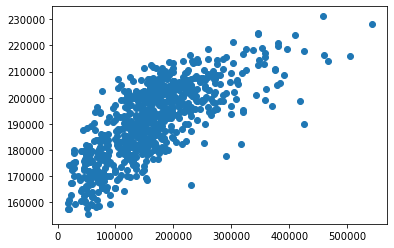

In [37]:
plt.scatter(y_test, reg_ridge_predict_test);

In [38]:
mse_ridge_train = mean_squared_error(y_train,reg_ridge_predict_train)
mse_ridge_train
np.sqrt(mse_ridge_train)

75229.54822685682

In [39]:
mse_ridge_test = mean_squared_error(y_test,reg_ridge_predict_test)
mse_ridge_test

5730391291.550861

In [40]:
#print('R-squared score (training): {:.3f}'.format(reg_ridge.score(x_train, y_train)))
#print('R-squared score (test): {:.3f}'.format(reg_ridge.score(x_test, y_test)))

In [41]:
from sklearn.linear_model import Lasso
linlasso = Lasso(alpha=.001, max_iter = 10000).fit(x_train, y_train)


print('lasso model intercept: {}'
     .format(linlasso.intercept_))
print('lasso model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(x_train, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(x_test, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

lasso model intercept: -20581.08541099605
lasso model coeff:
[  15092.97740954  -20734.38670756  344582.24069989  144591.58026686
  134901.21606784   30401.1476144    13234.79610188   21783.45483865
   37606.06243161   95230.20825135   37949.5815065    69124.2940651
   47315.76408704   40239.21675728   33004.13979509   18915.88295164
  147752.55451037  -17447.08949631   60680.43314478   12761.51673043
   -8103.75055909   26034.75019338   42116.73450979   68101.96655547
   82424.39522669   16170.14262434   81649.61538555  116828.12691718
  -41736.44281032    7284.72940647   28356.82439697  -18385.1079916
  -61348.32911764  -54933.8725307   -64022.86442819  -73100.82392201
    2205.57382378 -107141.68274607   13586.51151595   20929.47898039
   -6076.65386964    8012.28416065   23857.7312686   -75598.6725255
  -87654.85154994   33624.2049522 ]
Non-zero features: 46
R-squared score (training): 0.699
R-squared score (test): 0.704

Features with non-zero weight (sorted by absolute magnitude)

C:\Users\ducan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96013040298.49316, tolerance: 2020946801.5015852
  model = cd_fast.enet_coordinate_descent(


In [42]:
mse_laso_train = mean_squared_error(y_train,reg_ridge_predict_train)
mse_laso_train
np.sqrt(mse_laso_train)

75229.54822685682

In [44]:
def forward_regression(X, y,
                       threshold_in,
                       verbose=False):
    initial_list = []
    included = list(initial_list)
    while True:
        changed=False
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        if not changed:
            break

    return included

forward_regression(x_train,y_train,0.05)
    
   

<ipython-input-44-efcccf24a6c7>:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-44-efcccf24a6c7>:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-44-efcccf24a6c7>:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-44-efcccf24a6c7>:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-44-efcccf24a6c7>:9: Depre

['District_3.0',
 'FinishedSqft',
 'Year_Built',
 'District_14.0',
 'Rooms',
 'District_15.0',
 'District_7.0',
 'District_2.0',
 'District_11.0',
 'District_13.0',
 'District_10.0',
 'District_5.0',
 'Style_Colonial',
 'District_9.0',
 'Extwall_Fiber Cement/Hardiplank',
 'Style_Duplex O/S',
 'Style_Multiple Residential Bldgs',
 'Style_Dplx Bungalow',
 'Style_Duplex N/S',
 'Style_Townhouse',
 'Style_Triplex',
 'Fbath',
 'Hbath',
 'Style_Duplex-Cottage',
 'Extwall_Asphalt/Other',
 'Extwall_Aluminum/Vinyl',
 'District_8.0',
 'Style_Cottage',
 'Style_Res O/S A & 1/2',
 'Extwall_Prem Wood',
 'District_4.0',
 'Style_Ranch',
 'Style_Tudor',
 'Extwall_Stone']

In [46]:
def backward_regression(X, y,
                           threshold_out,
                           verbose=False):
    included=list(X.columns)
    while True:
        changed=False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included
removeL =backward_regression(x_train,y_train,0.05)

In [47]:
removeL

['FinishedSqft',
 'Fbath',
 'Hbath',
 'Extwall_Aluminum/Vinyl',
 'Extwall_Brick',
 'Extwall_Fiber Cement/Hardiplank',
 'Extwall_Masonry/Frame',
 'Extwall_Prem Wood',
 'Extwall_Stone',
 'Extwall_Stucco',
 'Extwall_Wood',
 'District_2.0',
 'District_3.0',
 'District_4.0',
 'District_5.0',
 'District_6.0',
 'District_7.0',
 'District_8.0',
 'District_9.0',
 'District_10.0',
 'District_11.0',
 'District_12.0',
 'District_13.0',
 'District_14.0',
 'District_15.0',
 'Style_Colonial',
 'Style_Cottage',
 'Style_Dplx Bungalow',
 'Style_Duplex N/S',
 'Style_Duplex O/S',
 'Style_Duplex-Cottage',
 'Style_Multiple Residential Bldgs',
 'Style_Ranch',
 'Style_Res O/S A & 1/2',
 'Style_Townhouse',
 'Style_Triplex',
 'Style_Tudor']

In [66]:
for ele in removeL:
    X=X.drop(ele,axis=1)
    


In [65]:
X

,Year_Built,Rooms,FinishedSqft,Fbath,Hbath,Extwall_Aluminum/Vinyl,Extwall_Asphalt/Other,Extwall_Block,Extwall_Brick,Extwall_Fiber Cement/Hardiplank,...,Style_Milwaukee Bungalow,Style_Multiple Residential Bldgs,Style_Ranch,Style_Res O/S 1 Story,Style_Res O/S A & 1/2,Style_Residence O/S 2sty+,Style_Split Level,Style_Townhouse,Style_Triplex,Style_Tudor
0,0.917647,0.523810,0.400345,0.500000,0.1,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.917647,0.523810,0.400345,0.500000,0.1,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.917647,0.476190,0.501055,0.500000,0.1,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.941176,0.333333,0.311721,0.333333,0.1,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.588235,0.238095,0.110301,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,0.647059,0.238095,0.083829,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4683,0.652941,0.238095,0.071744,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4684,0.647059,0.238095,0.083829,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4685,0.647059,0.238095,0.083829,0.166667,0.1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
